<h1><center>Insurance Claims Fraud Detection</center></h1>

## Business Problem

An insurance company has approached you with a dataset of previous claims of their clients. The insurance company wants you to develop a model to help them predict which claims look fraudulent. By doing so you hope to save the company millions of dollars annually.

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [301]:
#Load the dataset into a dataframe
df = pd.read_csv('insurance_claims.csv')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0  328                 48   521585         2014-10-17       OH            
1  228                 42   342868         2006-06-27       IN            
2  134                 29   687698         2000-09-06       OH            
3  256                 41   227811         1990-05-25       IL            
4  228                 44   367455         2014-06-06       IL            

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0  250/500    1000               1406.91                0                
1  250/500    2000               1197.22                5000000          
2  100/300    2000               1413.14                5000000          
3  250/500    2000               1415.74                6000000          
4  500/1000   1000               1583.91                6000000          

   insured_zip insured_sex insured_education_level insured_occupation  \
0  466132       MALE        MD                      craft-repair        
1  468176       MALE        MD                      machine-op-inspct   
2  430632       FEMALE      PhD                     sales               
3  608117       FEMALE      PhD                     armed-forces        
4  610706       MALE        Associate               sales               

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0  sleeping        husband              53300          0              
1  reading         other-relative       0              0              
2  board-games     own-child            35100          0              
3  board-games     unmarried            48900         -62400          
4  board-games     unmarried            66000         -46000          

  incident_date             incident_type   collision_type incident_severity  \
0  2015-01-25    Single Vehicle Collision  Side Collision   Major Damage       
1  2015-01-21    Vehicle Theft             ?                Minor Damage       
2  2015-02-22    Multi-vehicle Collision   Rear Collision   Minor Damage       
3  2015-01-10    Single Vehicle Collision  Front Collision  Major Damage       
4  2015-02-17    Vehicle Theft             ?                Minor Damage       

  authorities_contacted incident_state incident_city  incident_location  \
0  Police                SC             Columbus      9935 4th Drive      
1  Police                VA             Riverwood     6608 MLK Hwy        
2  Police                NY             Columbus      7121 Francis Lane   
3  Police                OH             Arlington     6956 Maple Drive    
4  None                  NY             Arlington     3041 3rd Ave        

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0  5                         1                            YES              
1  8                         1                            ?                
2  7                         3                            NO               
3  5                         1                            ?                
4  20                        1                            NO               

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0  1                2          YES                     71610                
1  0                0          ?                       5070                 
2  2                3          NO                      34650                
3  1                2          NO                      63400                
4  0                1          NO                      6500                 

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0  6510          13020           52080          Saab       92x         
1  780           780             3510           Mercedes   E400        
2  7700          3850            23100          Dodge      RAM         
3  6340          6340            50720          Chevrolet  Tahoe       
4  1300          650         

In [302]:
#Check the shape of the dataframe
df.shape

(1000, 39)

In [303]:
#check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [309]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [310]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

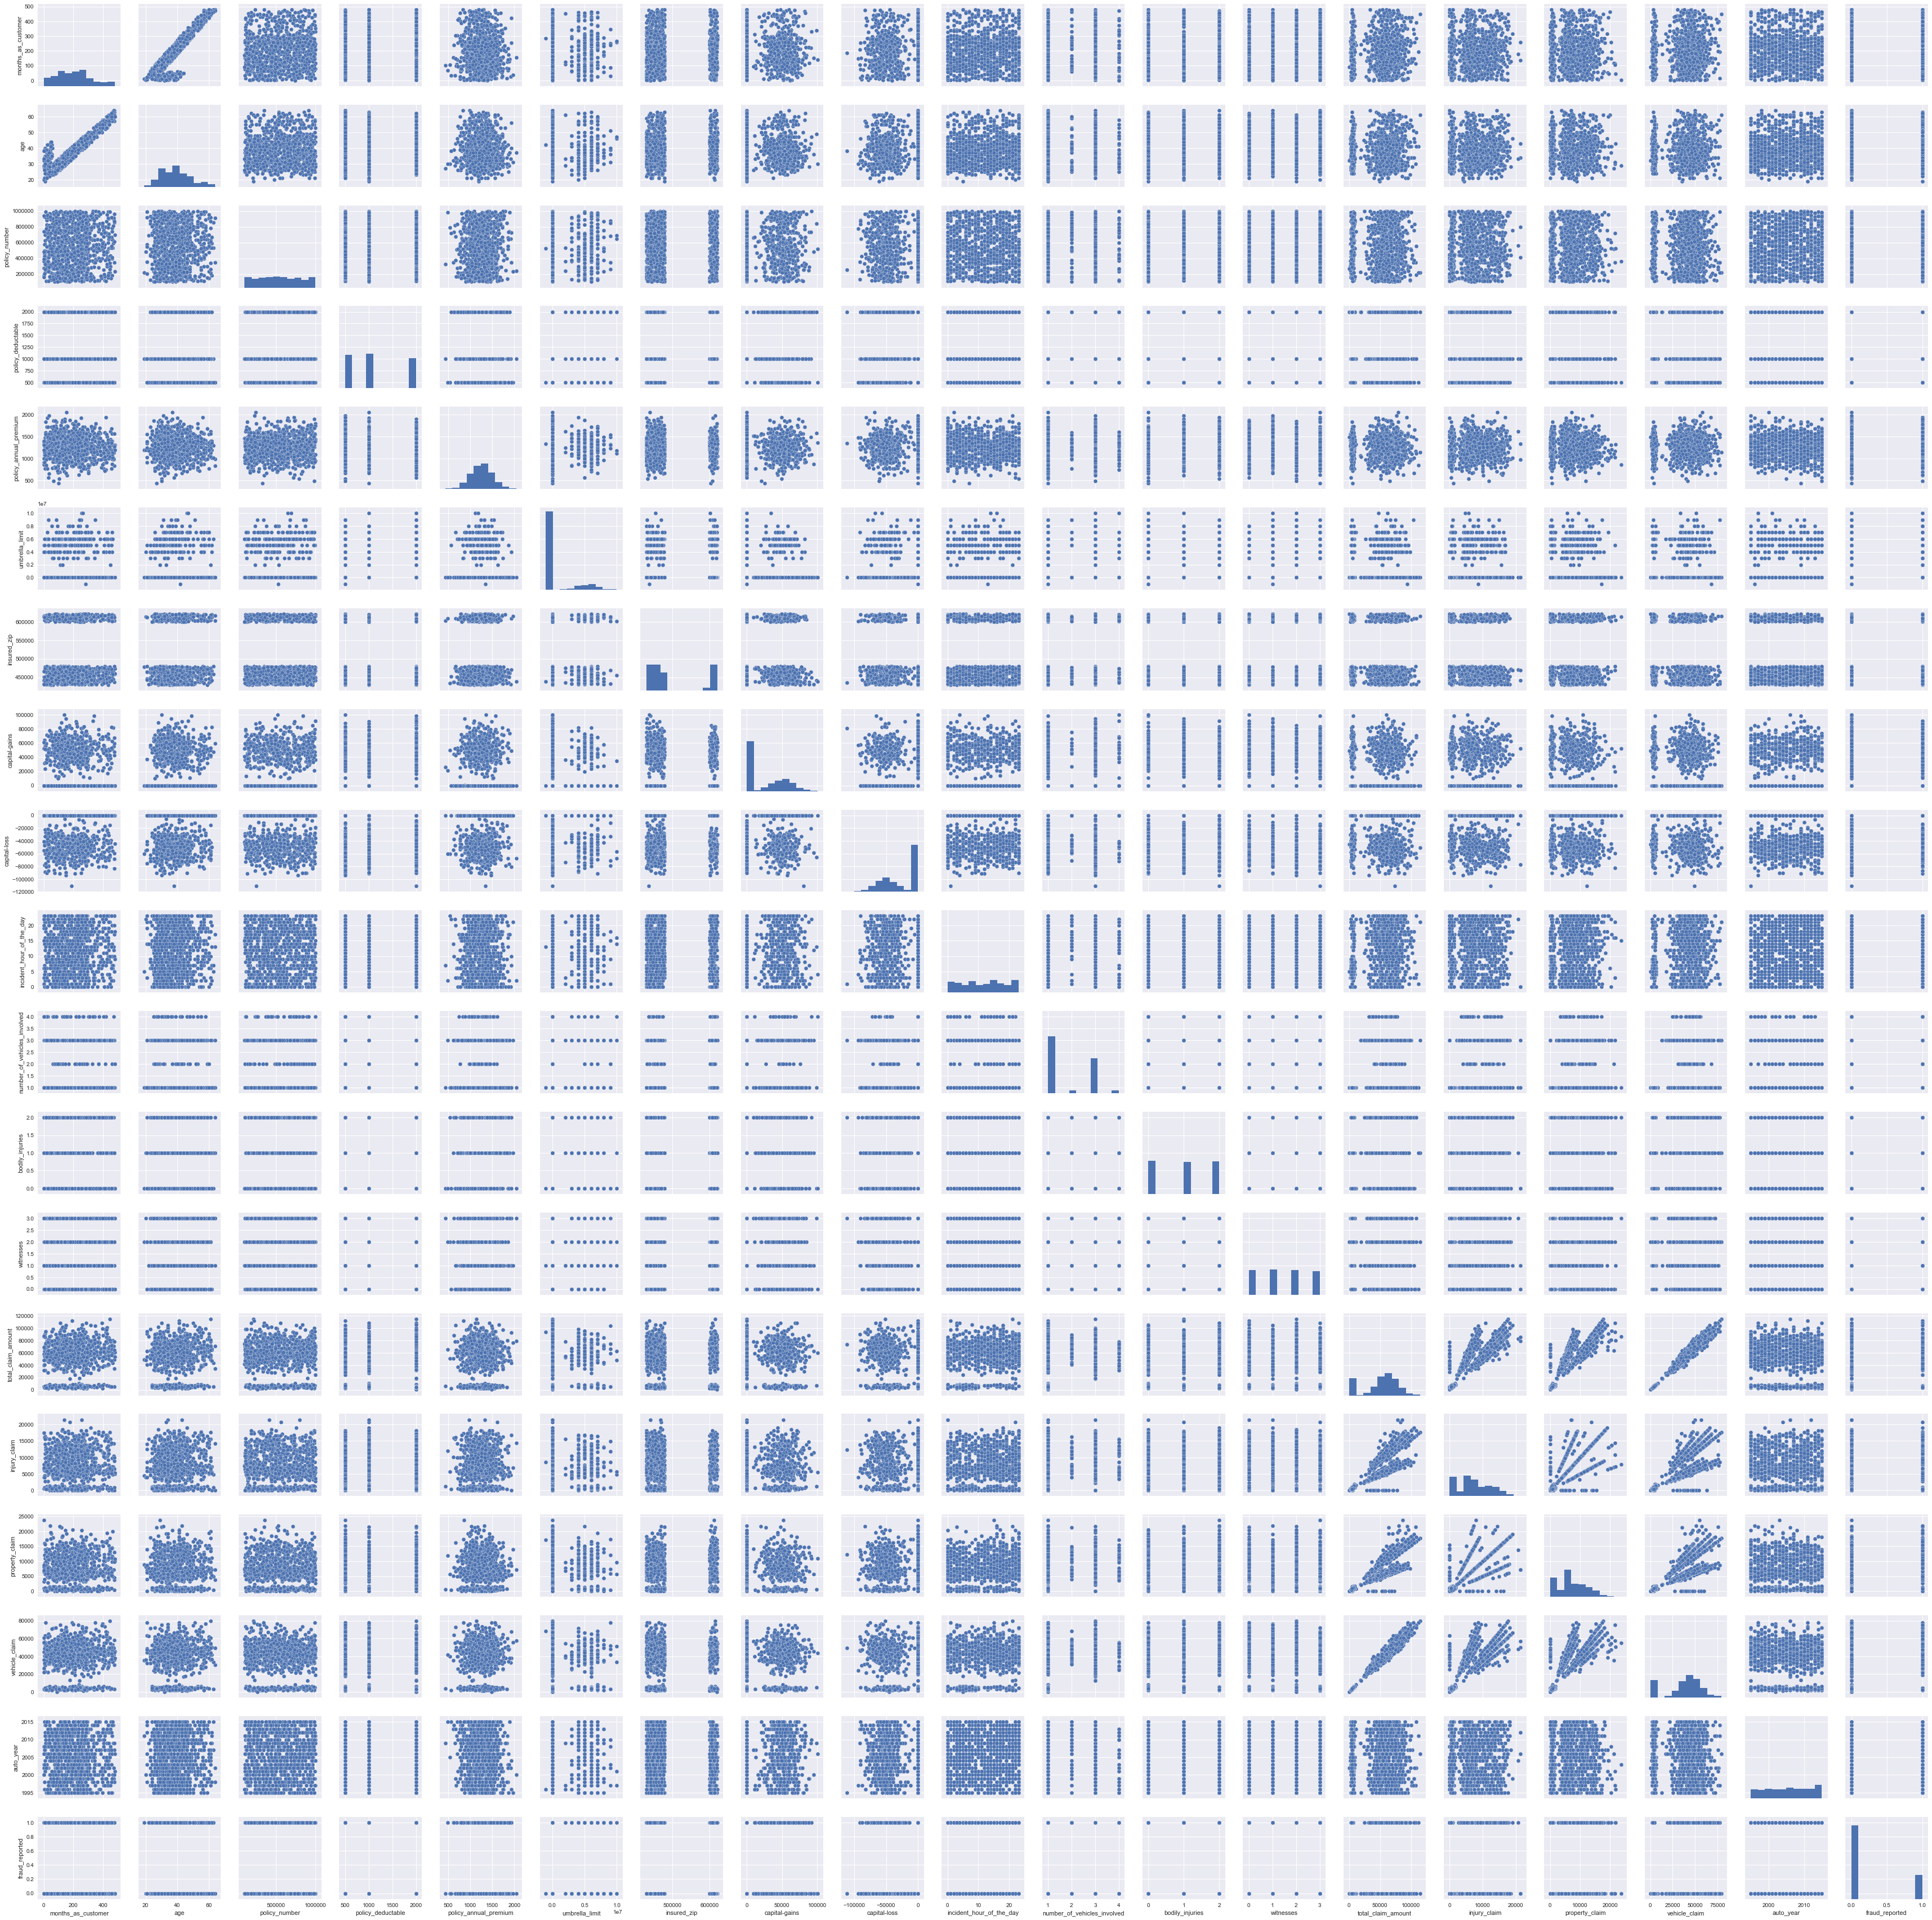

In [17]:
sns.pairplot(df)

In [311]:
df.policy_deductable.unique()

array([1000, 2000,  500], dtype=int64)

In [312]:
df.number_of_vehicles_involved.unique()

array([1, 3, 4, 2], dtype=int64)

In [313]:
df.number_of_vehicles_involved.value_counts()

1    581
3    358
4    31 
2    30 
Name: number_of_vehicles_involved, dtype: int64

In [314]:
df.bodily_injuries.unique()

array([1, 0, 2], dtype=int64)

In [315]:
df.witnesses.unique()

array([2, 0, 3, 1], dtype=int64)

In [316]:
df[df['capital-gains'] == 0].shape[0]

508

In [317]:
df[(df['capital-gains'] > 0) & (df['capital-gains'] <=50000)].shape[0]

233

In [318]:
df[df['capital-gains'] > 50000].shape[0]

259

In [319]:
df[df['capital-loss'] == 0].shape[0]

475

In [320]:
df[(df['capital-loss'] < 0) & (df['capital-loss'] >=-50000)].shape[0]

255

In [321]:
df[(df['capital-loss'] >= -100000) & (df['capital-loss'] < -50000)].shape[0]

269

In [322]:
df.umbrella_limit.value_counts()

 0           798
 6000000     57 
 5000000     46 
 4000000     39 
 7000000     29 
 3000000     12 
 8000000     8  
 9000000     5  
 2000000     3  
 10000000    2  
-1000000     1  
Name: umbrella_limit, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


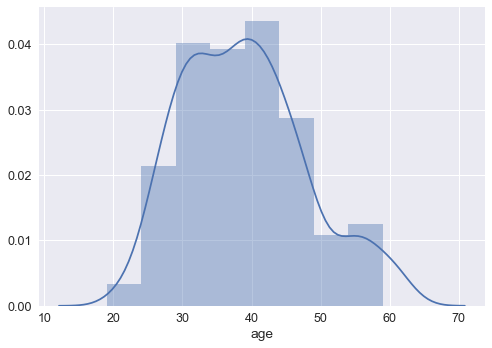

In [323]:
sns.distplot(df.age, bins=np.arange(19,64,5))

In [324]:
objectcols = [col for col in df.columns if df[col].dtype == 'O']
objectcols

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


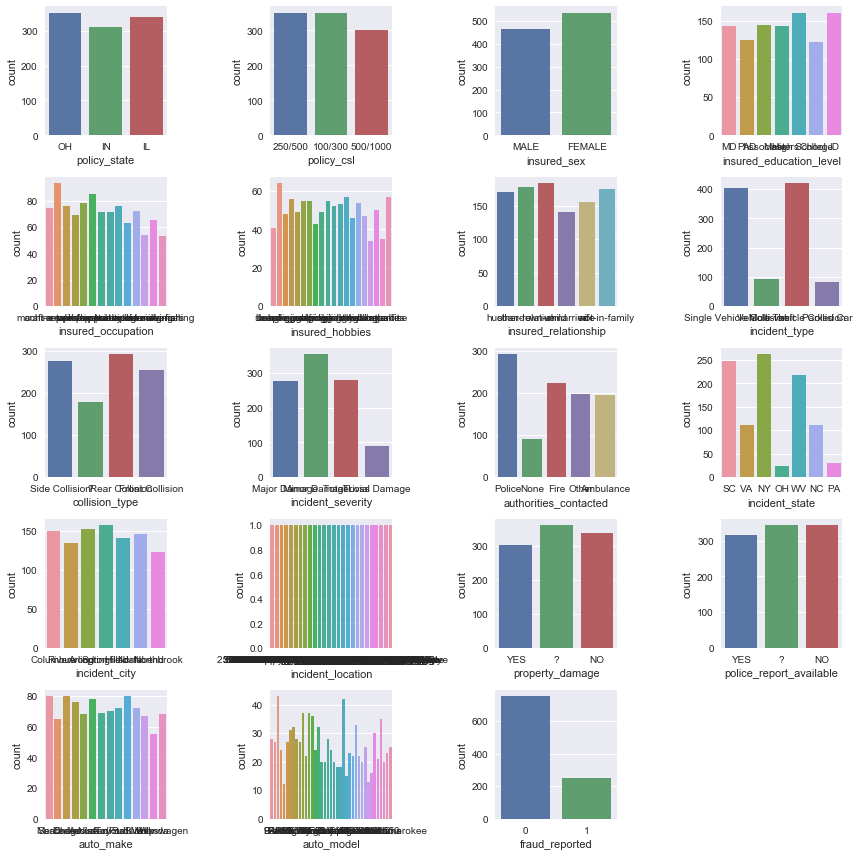

In [96]:
#Plot the distribution of categorical variables
fig = plt.figure(figsize=(12, 12))

sub1 = plt.subplot(5, 4, 1)
sns.countplot(x='policy_state', data=df)

sub2 = plt.subplot(5, 4, 2)
sns.countplot(x='policy_csl', data=df)

sub3 = plt.subplot(5, 4, 3)
sns.countplot(x='insured_sex', data=df)

sub4 = plt.subplot(5, 4, 4)
sns.countplot(x='insured_education_level', data=df)

sub5 = plt.subplot(5, 4, 5)
sns.countplot(x='insured_occupation', data=df)

sub6 = plt.subplot(5, 4, 6)
sns.countplot(x='insured_hobbies', data=df)

sub7 = plt.subplot(5, 4, 7)
sns.countplot(x='insured_relationship', data=df)

sub8 = plt.subplot(5, 4, 8)
sns.countplot(x='incident_type', data=df)

sub9 = plt.subplot(5, 4, 9)
sns.countplot(x='collision_type', data=df)

sub9 = plt.subplot(5, 4, 10)
sns.countplot(x='incident_severity', data=df)
sub9 = plt.subplot(5, 4, 11)
sns.countplot(x='authorities_contacted', data=df)
sub9 = plt.subplot(5, 4, 12)
sns.countplot(x='incident_state', data=df)
sub9 = plt.subplot(5, 4, 13)
sns.countplot(x='incident_city', data=df)
sub9 = plt.subplot(5, 4, 14)
sns.countplot(x='incident_location', data=df)
sub9 = plt.subplot(5, 4, 15)
sns.countplot(x='property_damage', data=df)
sub9 = plt.subplot(5, 4, 16)
sns.countplot(x='police_report_available', data=df)
sub9 = plt.subplot(5, 4, 17)
sns.countplot(x='auto_make', data=df)
sub9 = plt.subplot(5, 4, 18)
sns.countplot(x='auto_model', data=df)
sub9 = plt.subplot(5, 4, 19)
sns.countplot(x='fraud_reported', data=df)
    
fig.tight_layout()
plt.show()

In [325]:
df.fraud_reported = df.fraud_reported.map({'Y':1, 'N':0})
df.property_damage = df.property_damage.map({'?':'UNKNOWN'})
df.police_report_available = df.police_report_available.map({'?':'UNKNOWN'})
df.collision_type = df.collision_type.map({'?':'UNKNOWN'})
df.insured_sex = df.insured_sex.map({'MALE':1,'FEMALE':0})
df.insured_education_level = df.insured_education_level.map({'High School': 1, 'College': 2, 'Associate': 2, 'JD': 3,\
                                                             'Masters': 4, 'MD': 5, 'PhD': 6})
df.incident_severity = df.incident_severity.map({'Minor Damage': 1, 'Major Damage': 2, 'Total Loss': 3, 'Trivial Damage': 4})

In [327]:
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [345]:
features = ['months_as_customer','age','policy_state','csl_per_person','csl_per_accident','policy_deductable',\
            'policy_annual_premium','umbrella_limit','insured_sex','insured_education_level','insured_occupation',\
            'insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_type','collision_type',\
            'incident_severity','authorities_contacted','incident_state','incident_hour_of_the_day','number_of_vehicles_involved',\
            'property_damage','bodily_injuries','witnesses','police_report_available','total_claim_amount','auto_make',\
            'auto_model','fraud_reported']
df_final = pd.get_dummies(df[features],drop_first=True)
df_final.head()

months_as_customer  age  policy_deductable  policy_annual_premium  \
0  328                 48   1000               1406.91                 
1  228                 42   2000               1197.22                 
2  134                 29   2000               1413.14                 
3  256                 41   2000               1415.74                 
4  228                 44   1000               1583.91                 

   umbrella_limit  insured_sex  insured_education_level  capital-gains  \
0  0               1            5                        53300           
1  5000000         1            5                        0               
2  5000000         0            6                        35100           
3  6000000         0            6                        48900           
4  6000000         1            2                        66000           

   capital-loss  incident_severity  incident_hour_of_the_day  \
0  0             2                  5                          
1  0             1                  8                          
2  0             1                  7                          
3 -62400         2                  5                          
4 -46000         1                  20                         

   number_of_vehicles_involved  bodily_injuries  witnesses  \
0  1                            1                2           
1  1                            0                0           
2  3                            2                3           
3  1                            1                2           
4  1                            0                1           

   total_claim_amount  fraud_reported  policy_state_IN  policy_state_OH  \
0  71610               1               0                1                 
1  5070                1               1                0                 
2  34650               0               0                1                 
3  63400               1               0                0                 
4  6500                0               0                0                 

   csl_per_person_250  csl_per_person_500  csl_per_accident_300  \
0  1                   0                   0                      
1  1                   0                   0                      
2  0                   0                   1                      
3  1                   0                   0                      
4  0                   1                   0                      

   csl_per_accident_500  insured_occupation_armed-forces  \
0  1                     0                                 
1  1                     0                                 
2  0                     0                                 
3  1                     1                                 
4  0                     0                                 

   insured_occupation_craft-repair  insured_occupation_exec-managerial  \
0  1                                0                                    
1  0                                0                                    
2  0                                0                                    
3  0                                0                                    
4  0                                0                                    

   insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  \
0  0                                   0                                      
1  0                                   0                                      
2  0                                   0                                      
3  0                                   0                                      
4  0                                   0                                      

   insured_occupation_machine-op-inspct  insured_occupation_other-service  \
0  0                                     0                                  
1  1                                     0                                  
2

In [356]:
#We use sklearn’s train_test_split to split the data into a training set and a test set.
from sklearn.model_selection import train_test_split

X = df_final.drop('fraud_reported', axis=1)
y = df['fraud_reported'].values
feature_name = X.columns.tolist()

Due to the massive amounts of computations taking place in deep learning, feature scaling is compulsory. Feature scaling standardizes the range of our independent variables.

In [333]:
print(X.shape)
print(y.shape)

(1000, 122)
(1000,)


In [334]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0,0.5,'Cumulative explained variance')

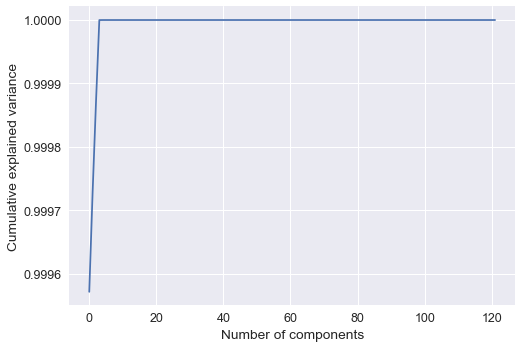

In [347]:
# apply PCA on X_train
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
#plt.annotate('90',xy=(90, .90))

In [348]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=10)
X_r2 = lda.fit(X, y).transform(X)
# Percentage of variance explained for each components
print('LDA explained variance ratio (first two components): %s'
      % str(lda.explained_variance_ratio_))

LDA explained variance ratio (first two components): [ 1.]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


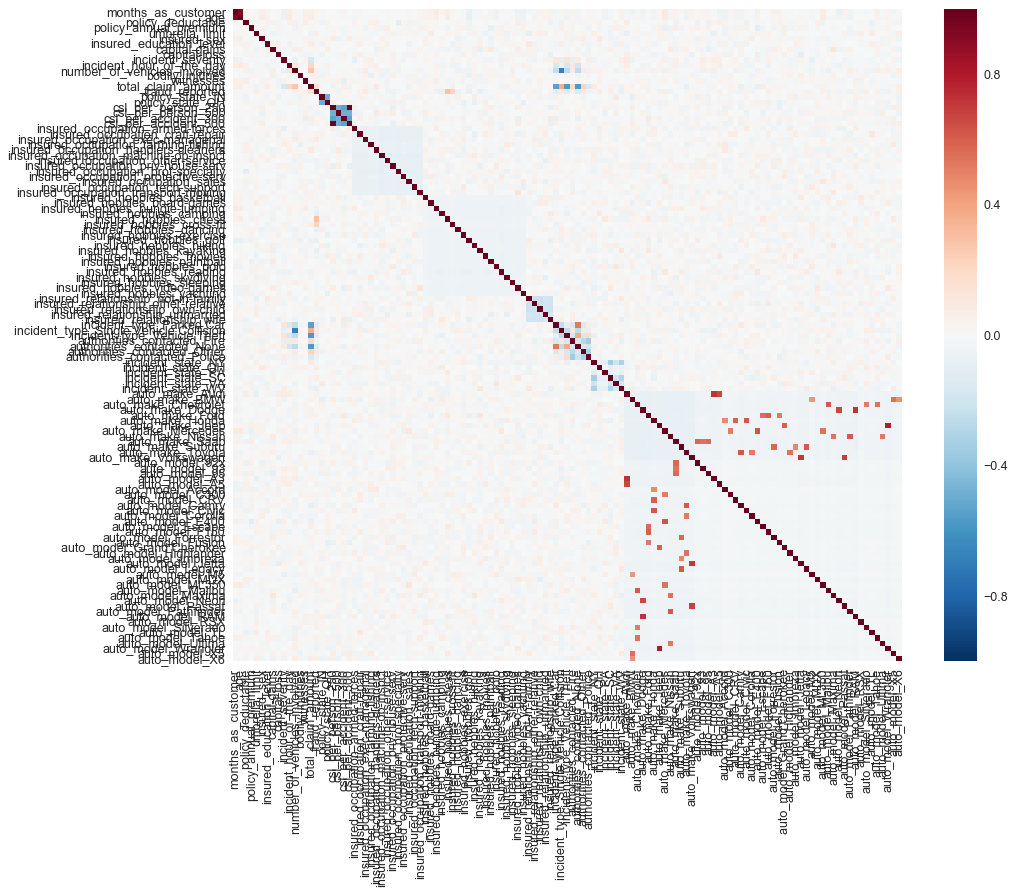

In [349]:
#Check the correlations among feature variables
corrmat = df_final.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat);

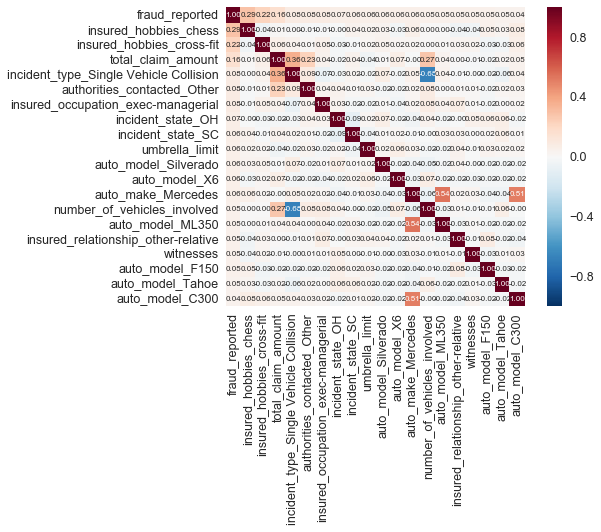

In [351]:
#saleprice correlation matrix
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'fraud_reported')['fraud_reported'].index
cm = np.corrcoef(df_final[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [352]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [357]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

100 selected features


In [358]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)

SelectKBest(k=100, score_func=<function chi2 at 0x000000002EE620D0>)

In [360]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

100 selected features


In [361]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 122 features.
Fitting estimator with 112 features.
Fitting estimator with 102 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=100, step=10, verbose=5)

In [362]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

100 selected features


In [363]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '1.25*median')
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold='1.25*median')

In [364]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

56 selected features


In [365]:
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold='1.25*median')

In [366]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

41 selected features


In [367]:
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.2,
        learning_rate=0.05, max_depth=-1, min_child_samples=20,
        min_child_weight=40, min_split_gain=0.01, n_estimators=500,
        n_jobs=-1, num_leaves=32, objective=None, random_state=None,
        reg_alpha=3, reg_lambda=1, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
        norm_order=1, prefit=False, threshold='1.25*median')

In [368]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

122 selected features


In [386]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

Chi-2                                 Feature  LightGBM  Logistics  \
1    True   witnesses                               True      True        
2    True   umbrella_limit                          True      True        
3    True   insured_relationship_wife               True      True        
4    True   insured_relationship_other-relative     True      True        
5    True   insured_relationship_not-in-family      True      True        
6    True   insured_occupation_exec-managerial      True      True        
7    True   insured_occupation_craft-repair         True      True        
8    True   insured_hobbies_cross-fit               True      True        
9    True   insured_hobbies_chess                   True      True        
10   True   incident_state_WV                       True      True        
11   True   incident_state_NY                       True      True        
12   True   csl_per_person_500                      True      True        
13   True   capital-gains                           True      True        
14   True   auto_make_Audi                          True      True        
15   True   authorities_contacted_Other             True      True        
16   True   total_claim_amount                      True      False       
17   True   policy_state_OH                         True      False       
18   True   number_of_vehicles_involved             True      False       
19   True   insured_sex                             True      False       
20   True   insured_occupation_tech-support         True      False       
21   True   insured_occupation_protective-serv      True      True        
22   True   insured_occupation_priv-house-serv      True      True        
23   True   insured_occupation_other-service        True      True        
24   True   insured_occupation_handlers-cleaners    True      True        
25   True   insured_occupation_farming-fishing      True      True        
26   True   insured_hobbies_yachting                True      True        
27   True   insured_hobbies_sleeping                True      True        
28   True   insured_hobbies_movies                  True      True        
29   True   insured_hobbies_kayaking                True      True        
30   True   insured_hobbies_golf                    True      True        
31   True   insured_hobbies_dancing                 True      True        
32   True   insured_hobbies_camping                 True      True        
33   True   insured_hobbies_bungie-jumping          True      True        
34   True   insured_hobbies_board-games             True      True        
35   True   incident_type_Vehicle Theft             True      True        
36   True   incident_type_Single Vehicle Collision  True      False       
37   True   incident_type_Parked Car                True      True        
38   True   incident_state_VA                       True      False       
39   True   incident_state_SC                       True      False       
40   True   incident_state_OH                       True      True        
41   True   incident_severity                       True      False       
42   True   csl_per_person_250                      True      False       
43   True   csl_per_accident_300                    True      False       
44   True   bodily_injuries                         True      False       
45   True   auto_model_X6                           True      True        
46   True   auto_model_Wrangler                     True      True        
47   True   auto_model_TL                           True      True        
48   True   auto_model_RSX                          True      True        
49   True   auto_model_RAM                          True      True        
50   True   auto_model_Pathfinder                   True      True        
51   True   auto_model_Neon                         True      True        
52   True   auto_model_Maxima                       True      True        
53   True   auto_model_Malibu 

In [390]:
support6 = feature_selection_df[feature_selection_df['Total'] == 6]['Feature']
support56 = feature_selection_df[feature_selection_df['Total'] >= 5]['Feature']
support456 = feature_selection_df[feature_selection_df['Total'] >= 4]['Feature']
support3456 = feature_selection_df[feature_selection_df['Total'] >= 3]['Feature']
support23456 = feature_selection_df[feature_selection_df['Total'] >= 2]['Feature']

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X[support6], y, test_size=0.3)

In [405]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [406]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
lr = LogisticRegression()
lr_score = cross_validate(lr, X_train, y_train, cv=10, scoring='roc_auc')
print(lr_score['test_score'].mean())

0.705018758834


In [408]:
X_train, X_test, y_train, y_test = train_test_split(X[support56], y, test_size=0.3)

In [409]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [410]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
lr = LogisticRegression()
lr_score = cross_validate(lr, X_train, y_train, cv=10, scoring='roc_auc')
print(lr_score['test_score'].mean())

0.727044025157


In [411]:
X_train, X_test, y_train, y_test = train_test_split(X[support456], y, test_size=0.3)

In [412]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [413]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
lr = LogisticRegression()
lr_score = cross_validate(lr, X_train, y_train, cv=10, scoring='roc_auc')
print(lr_score['test_score'].mean())

0.662650355256


In [414]:
X_train, X_test, y_train, y_test = train_test_split(X[support3456], y, test_size=0.3)

In [415]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [416]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
lr = LogisticRegression()
lr_score = cross_validate(lr, X_train, y_train, cv=10, scoring='roc_auc')
print(lr_score['test_score'].mean())

0.684268429191


In [417]:
X_train, X_test, y_train, y_test = train_test_split(X[support23456], y, test_size=0.3)

In [418]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [419]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
lr = LogisticRegression()
lr_score = cross_validate(lr, X_train, y_train, cv=10, scoring='roc_auc')
print(lr_score['test_score'].mean())

0.703924651622


In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [421]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [422]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
lr = LogisticRegression()
lr_score = cross_validate(lr, X_train, y_train, cv=10, scoring='roc_auc')
print(lr_score['test_score'].mean())

0.685278228369


In [424]:
X_train, X_test, y_train, y_test = train_test_split(X[support56], y, test_size=0.3)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [425]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 10)
dtc_score = cross_validate(dtc, X_train, y_train, cv=10, scoring='roc_auc')
print(dtc_score['test_score'].mean())

0.787026167506


In [426]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50, max_depth = 10)
rfc_score = cross_validate(rfc, X_train, y_train, cv=10, scoring = 'roc_auc')
print(rfc_score['test_score'].mean())

0.871235426924


In [427]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=15)
knc_score = cross_validate(knc, X_train, y_train, cv=10, scoring = 'roc_auc')
print(knc_score['test_score'].mean())

0.712926757544


In [428]:
from sklearn.svm import SVC
svc = SVC()
svc_score = cross_validate(svc, X_train, y_train, cv=10, scoring = 'roc_auc')
print(svc_score['test_score'].mean())

0.697608307958


In [430]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc_score = cross_validate(svc, X_train, y_train, cv=10, scoring = 'roc_auc')
print(svc_score['test_score'].mean())

0.723937552767


In [431]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=10)
lda_score = cross_validate(lda, X_train, y_train, cv=10, scoring = 'roc_auc')
print(lda_score['test_score'].mean())

0.72503557301


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

In [453]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 50, max_depth=10, min_samples_split=20).fit(X_train, y_train)
scoring = {'AUC':'roc_auc','ACC':'accuracy','pre':'precision','rec':'recall', 'f1_score':'f1'}
gbc_cv_score = cross_validate(gbc, X_train, y_train, scoring=scoring, cv=10)
print("ROC_AUC: %.4f" %gbc_cv_score['test_AUC'].mean(), "Accuracy: %.4f" %gbc_cv_score['test_ACC'].mean(), "Precision: %.4f" %gbc_cv_score['test_pre'].mean(),
      "Recall: %.4f" %gbc_cv_score['test_rec'].mean(), "F1-Score: %.4f" %gbc_cv_score['test_f1_score'].mean())

ROC_AUC: 0.8689 Accuracy: 0.8386 Precision: 0.6874 Recall: 0.6611 F1-Score: 0.6671


In [454]:
#XGBoost
from xgboost import XGBClassifier
from sklearn.grid_search import GridSearchCV

cv_params = {'max_depth': [3,5,7], 'min_child_weight': [15,20,25]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 50, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(XGBClassifier(**ind_params), cv_params, scoring = 'f1', cv = 10) 
optimized_GBM.fit(X_train, y_train)
optimized_GBM.grid_scores_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[mean: 0.58597, std: 0.09518, params: {'max_depth': 3, 'min_child_weight': 15},
 mean: 0.59815, std: 0.11564, params: {'max_depth': 3, 'min_child_weight': 20},
 mean: 0.47234, std: 0.10682, params: {'max_depth': 3, 'min_child_weight': 25},
 mean: 0.58794, std: 0.09291, params: {'max_depth': 5, 'min_child_weight': 15},
 mean: 0.60185, std: 0.11954, params: {'max_depth': 5, 'min_child_weight': 20},
 mean: 0.47234, std: 0.10682, params: {'max_depth': 5, 'min_child_weight': 25},
 mean: 0.58794, std: 0.09291, params: {'max_depth': 7, 'min_child_weight': 15},
 mean: 0.60185, std: 0.11954, params: {'max_depth': 7, 'min_child_weight': 20},
 mean: 0.47234, std: 0.10682, params: {'max_depth': 7, 'min_child_weight': 25}]

In [456]:
print(optimized_GBM.best_params_)
print(optimized_GBM.best_score_)

{'max_depth': 5, 'min_child_weight': 20}
0.6018523878355063


In [458]:
#XGBoost
import xgboost as xgb
xgdmat = xgb.DMatrix(X_train, y_train)
tuned_params = {'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'binary:logistic', 'max_depth':5, 'min_child_weight':20} 
xgb_cv_score = xgb.cv(params = tuned_params, dtrain = xgdmat, num_boost_round = 50, nfold = 10, metrics = ['auc','error'], early_stopping_rounds = 25)
print(xgb_cv_score.tail(5))
print("ROC_AUC: %.4f" %xgb_cv_score["test-auc-mean"].iloc[-1], "Accuracy: %.4f" %(1-xgb_cv_score["test-error-mean"].iloc[-1]))

   test-auc-mean  test-auc-std  test-error-mean  test-error-std  \
3  0.776344       0.076861      0.195714         0.043822         
4  0.778546       0.070135      0.182857         0.040305         
5  0.793067       0.062178      0.184286         0.037498         
6  0.793279       0.058047      0.171429         0.031298         
7  0.794825       0.058356      0.168571         0.036027         

   train-auc-mean  train-auc-std  train-error-mean  train-error-std  
3  0.796112        0.041989       0.201111          0.028922         
4  0.796901        0.039881       0.188571          0.025285         
5  0.816002        0.006980       0.186508          0.019816         
6  0.818155        0.006886       0.178730          0.008872         
7  0.820103        0.007114       0.174445          0.008014         
ROC_AUC: 0.7948 Accuracy: 0.8314


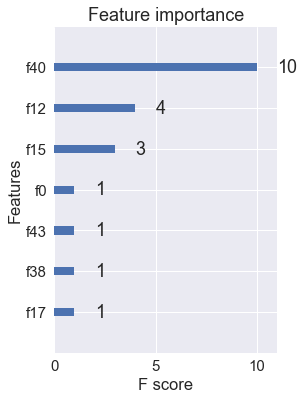

In [463]:
final_gb = xgb.train(tuned_params, xgdmat, num_boost_round = 7)

#Plot feature importances
sns.set(font_scale = 1.5, rc={'figure.figsize':(4,6)})
xgb.plot_importance(final_gb)

In [479]:
testdmat = xgb.DMatrix(X_test)
y_pred = final_gb.predict(testdmat)
y_pred[0:10]

array([ 0.53634608,  0.13929342,  0.62235302,  0.18702345,  0.57508171,
        0.16546598,  0.13965239,  0.57508171,  0.18330199,  0.56660396], dtype=float32)

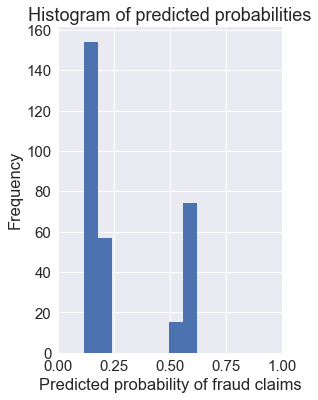

In [480]:
#Plot the histogram of predicted probabilities for Class 1
plt.hist(y_pred, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of fraud claims')
plt.ylabel('Frequency')
plt.show()

In [482]:
#Predict target classes if the probability is greater than 0.7
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred], 0.5)[0]

In [483]:
#Get the new confusion matrix (threshold of 0.7)
df_confusion = metrics.confusion_matrix(y_test, y_pred_class)
df_confusion

array([[185,  39],
       [ 26,  50]], dtype=int64)

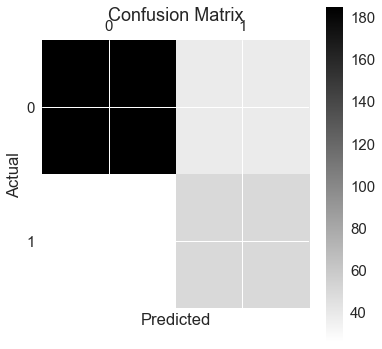

In [484]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(df_confusion)

In [485]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('True Positive: ', str(TP))
print('True Negative: ', str(TN))
print('False Positive: ', str(FP))
print('False Negative: ', str(FN))

True Positive:  50
True Negative:  185
False Positive:  39
False Negative:  26


In [489]:
#Print classification and mis-classification scores
print('Classification Rate: ',metrics.accuracy_score(y_test, y_pred_class))
print('Misclassification Rate: ', 1 - metrics.accuracy_score(y_test, y_pred_class))

Classification Rate:  0.783333333333
Misclassification Rate:  0.216666666667


In [486]:
#Print Recall and Precision scores
print('Recall: ', str(metrics.recall_score(y_test, y_pred_class)))
print('Precision: ', str(metrics.precision_score(y_test, y_pred_class)))

Recall:  0.657894736842
Precision:  0.561797752809


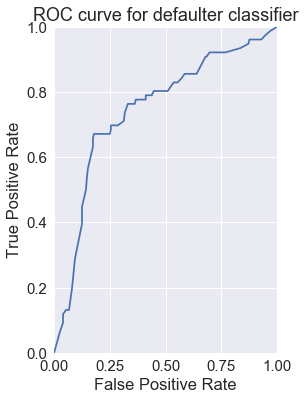

In [487]:
#Plot the AUC-ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for defaulter classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [488]:
# AUC is the percentage of the ROC plot that is underneath the curve:
print('Area under ROC curve: ', str(metrics.roc_auc_score(y_test, y_pred)))

Area under ROC curve:  0.744243421053


In [464]:
#Hyper-parameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = dict(n_estimators=[40,50,60], max_depth=[3,5,7], min_samples_split=[10,20,30], criterion=['gini','entropy'])
grid = GridSearchCV(rfc, param_grid, cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 50, 60], 'max_depth': [3, 5, 7], 'min_samples_split': [10, 20, 30], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [465]:
#Check the best score and best fitting params
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.880191423449
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 20, 'n_estimators': 60}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [468]:
#Check the prediction score
from sklearn import metrics
y_pred_class = grid.predict(X_test)
metrics.roc_auc_score(y_test, y_pred_class)

0.52619830827067682

In [469]:
param_grid = dict(n_estimators=[40,50,60], max_depth=[7,10,12], min_samples_split=[10,20,30])
grid = GridSearchCV(gbc, param_grid, cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=20,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 50, 60], 'max_depth': [7, 10, 12], 'min_samples_split': [10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [470]:
#Check the best score and best fitting params
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.881020233928
{'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 40}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=30,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [471]:
y_pred_class = grid.predict(X_test)
metrics.roc_auc_score(y_test, y_pred_class)

0.74447838345864659

In [432]:
#import keras and its modules
import keras
from keras.models import Sequential #Sequential module is required to initialize ANN
from keras.layers import Dense #Dense module is required to build the layers of ANN

Next we need to initialize our ANN by creating an instance of Sequential. The Sequential function initializes a linear stack of layers. This allows us to add more layers later using the Dense module.

In [444]:
classifier = Sequential()

<b>Adding input layer (First Hidden Layer)</b>

We use the add method to add different layers to our ANN. The first parameter is the number of nodes you want to add to this layer. There is no rule of thumb as to how many nodes you should add. However a common strategy is to choose the number of nodes as the average of nodes in the input layer and the number of nodes in the output layer.

Say for example you had five independent variables and one output. Then you would take the sum of that and divide by two, which is three. You can also decide to experiment with a technique called parameter tuning. The second parameter, kernel_initializer, is the function that will be used to initialize the weights. In this case, it will use a uniform distribution to make sure that the weights are small numbers close to zero. The next parameter is the activation function. We use the Rectifier function, shortened as relu. We mostly use this function for the hidden layer in ANN. The final parameter is input_dim, which is the number of nodes in the input layer. It represents the number of independent variables.

In [445]:
classifier.add(
        Dense(5, kernel_initializer = 'uniform',
              activation = 'relu', input_dim=63))

<b>Adding Second Hidden Layer</b>

Adding the second hidden layer is similar to adding the first hidden layer. 

We don’t need to specify the input_dim parameter because we have already specified it in the first hidden layer. In the first hidden layer we specified this in order to let the layer know how many input nodes to expect. In the second hidden layer the ANN already knows how many input nodes to expect so we don’t need to repeat ourselves.

In [446]:
classifier.add(
        Dense(5, kernel_initializer = 'uniform',
              activation = 'relu'))

<b>Adding the Output layer</b>

We change the first parameter because in our output node we expect one node. This is because we are only interested in knowing whether a claim was fraudulent or not. We change the activation function because we want to get the probabilities that a claim is fraudulent. We do this by using the Sigmoid activation function. In case you’re dealing with a classification problem that has more than two classes (i.e. classifying cats, dogs, and monkeys) we’d need to change two things. We ‘d change the first parameter to 3 and change the activation function to softmax. Softmax is a sigmoid function applied to an independent variable with more than two categories.

In [447]:
classifier.add(
     Dense(1, kernel_initializer = 'uniform',
           activation = 'sigmoid'))

<b>Compiling the ANN</b>

Compiling is basically applying a stochastic gradient descent to the whole neural network. The first parameter is the algorithm you want to use to get the optimal set of weights in the neural network. The algorithm used here is a stochastic gradient algorithm. There are many variants of this. A very efficient one to use is adam. The second parameter is the loss function within the stochastic gradient algorithm. Since our categories are binary we use the binary_crossentropy loss function. Otherwise we would have used categorical_crossentopy. The final argument is the criterion we’ll use to evaluate our model. In this case we use the accuracy.

In [448]:
classifier.compile(optimizer= 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [450]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 5)                 320       
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 356
Trainable params: 356
Non-trainable params: 0
_________________________________________________________________


<b>Fitting ANN to the training set</b>

X_train represents the independent variables we’re using to train our ANN, and y_train represents the column we’re predicting. Epochs represents the number of times we’re going to pass our full dataset through the ANN. Batch_size is the number of observations after which the weights will be updated.

In [452]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 30, verbose=2, validation_data = [X_test, y_test])

Train on 700 samples, validate on 300 samples
Epoch 1/30
 - 0s - loss: 0.0767 - acc: 0.9843 - val_loss: 1.5046 - val_acc: 0.7333
Epoch 2/30
 - 0s - loss: 0.0752 - acc: 0.9871 - val_loss: 1.5116 - val_acc: 0.7233
Epoch 3/30
 - 0s - loss: 0.0733 - acc: 0.9871 - val_loss: 1.5220 - val_acc: 0.7233
Epoch 4/30
 - 0s - loss: 0.0728 - acc: 0.9871 - val_loss: 1.5476 - val_acc: 0.7367
Epoch 5/30
 - 0s - loss: 0.0716 - acc: 0.9886 - val_loss: 1.5337 - val_acc: 0.7333
Epoch 6/30
 - 0s - loss: 0.0709 - acc: 0.9871 - val_loss: 1.5334 - val_acc: 0.7200
Epoch 7/30
 - 0s - loss: 0.0692 - acc: 0.9886 - val_loss: 1.5594 - val_acc: 0.7300
Epoch 8/30
 - 0s - loss: 0.0694 - acc: 0.9871 - val_loss: 1.5727 - val_acc: 0.7200
Epoch 9/30
 - 0s - loss: 0.0676 - acc: 0.9871 - val_loss: 1.5844 - val_acc: 0.7300
Epoch 10/30
 - 0s - loss: 0.0684 - acc: 0.9871 - val_loss: 1.5828 - val_acc: 0.7300
Epoch 11/30
 - 0s - loss: 0.0670 - acc: 0.9871 - val_loss: 1.5720 - val_acc: 0.7233
Epoch 12/30
 - 0s - loss: 0.0648 - acc:

<b>Predicting using the training set</b>

In [24]:
y_pred = classifier.predict(X_test)
y_pred[0:10]

array([[  9.79284209e-07],
       [  9.70875135e-07],
       [  9.70475185e-07],
       [  9.70506676e-07],
       [  9.70475185e-07],
       [  9.70530778e-07],
       [  9.70475185e-07],
       [  9.70475185e-07],
       [  9.73435817e-07],
       [  9.70475185e-07]], dtype=float32)

In [25]:
y_pred = (y_pred > 0.5)
y_pred[0:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]], dtype=bool)

<b>Checking the confusion matrix</b>

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[225,   0],
       [ 75,   0]], dtype=int64)